In [1]:
import numpy as np
import pandas as pd

import math
import statistics
import scipy.stats

In [2]:
df_can = pd.read_excel("Canada.xlsx",
                       sheet_name="Canada by Citizenship",
                       skiprows=20,
                       skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
df_can = df_can.drop(columns=['Type','Coverage','AREA', 'AreaName','REG','RegName','DEV','DevName'])
df_can = df_can.rename(columns={"OdName":"Country"})
df_can = df_can.set_index("Country")
df_id = df_can.loc[["Indonesia"]].T

In [4]:
df_id.head()

Country,Indonesia
1980,186
1981,178
1982,252
1983,115
1984,123


In [5]:
print("mean")
print(np.mean(df_id))
print(df_id.mean())

mean
Country
Indonesia    386.764706
dtype: float64
Country
Indonesia    386.764706
dtype: float64


c:\Users\razan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [6]:
print(np.median(df_id))
print(df_id.median())

266.0
Country
Indonesia    266.0
dtype: float64


In [7]:
print("mode")
print("statistics")
print(statistics.mode(df_id["Indonesia"]))
print("scipy.stats")
print(scipy.stats.mode(df_id))
print("pandas")
print(df_id.mode())

mode
statistics
252
scipy.stats
ModeResult(mode=array([[252]], dtype=int64), count=array([[2]]))
pandas
Country  Indonesia
0              252


In [8]:
print("standard deviation")
print("sampe")
print(np.std(df_id, ddof=1))
print(df_id.std())
print("populasi")
print(np.std(df_id))
print(df_id.std(ddof=0))

standard deviation
sampe
Country
Indonesia    251.233449
dtype: float64
Country
Indonesia    251.233449
dtype: float64
populasi
Country
Indonesia    247.511266
dtype: float64
Country
Indonesia    247.511266
dtype: float64


In [9]:
print("variance")
print(np.var(df_id, ddof=1))
print(df_id.var())

variance
Country
Indonesia    63118.245989
dtype: float64
Country
Indonesia    63118.245989
dtype: float64


In [10]:
df_id["Indonesia"].sort_values()

1985     100
1983     115
1984     123
1986     127
1998     165
1997     166
1981     178
1980     186
1995     205
1987     213
1990     227
1996     231
1992     243
1991     252
1982     252
1989     260
1994     262
1988     270
1993     278
2013     387
2011     390
2012     395
2009     504
2003     515
1999     525
2004     552
2006     613
2005     632
2007     657
2008     661
2002     709
2010     712
2001     907
2000    1138
Name: Indonesia, dtype: int64

In [11]:
print("percentile numpy")
print(np.percentile(df_id, 20))
print(np.percentile(df_id, [25, 50, 75]))

percentile numpy
182.8
[207.   266.   545.25]


In [12]:
print("percentile pandas")
print(df_id.quantile(0.2))
print(df_id.quantile([0.25, 0.50, 0.75]))

percentile pandas
Country
Indonesia    182.8
Name: 0.2, dtype: float64
Country  Indonesia
0.25        207.00
0.50        266.00
0.75        545.25


In [13]:
print("range")
print(np.max(df_id) - np.min(df_id))
print(df_id.max() - df_id.min())


range
Country
Indonesia    1038
dtype: int64
Country
Indonesia    1038
dtype: int64


c:\Users\razan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\razan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [14]:
print("Inter Quartal Range")
print(np.percentile(df_id, 75) - np.percentile(df_id, 25))
print(df_id.quantile(0.75) - df_id.quantile(0.25))


Inter Quartal Range
338.25
Country
Indonesia    338.25
dtype: float64


In [15]:
df_sg = df_can.loc["Singapore"].T
df_id = df_can.loc["Indonesia"].T
print(df_sg.head())
print(df_id.head())

1980    241
1981    301
1982    337
1983    169
1984    128
Name: Singapore, dtype: int64
1980    186
1981    178
1982    252
1983    115
1984    123
Name: Indonesia, dtype: int64


In [16]:
print("pandas correlation")
df_id.corr(df_sg)

pandas correlation


0.23829882620353515

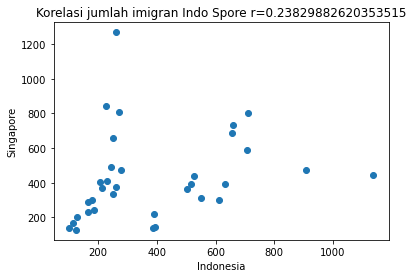

In [17]:
import matplotlib.pyplot as plt

plt.scatter(x=df_id, y=df_sg)
plt.xlabel("Indonesia")
plt.ylabel("Singapore")
plt.title("Korelasi jumlah imigran Indo Spore r=" + str(df_id.corr(df_sg)))
plt.show()